In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as dates

### Analysis of BlackRock Inc (BLK)
Data consists of stock prices in the time period 2019-11-11 until 2022-11-10  
Datasource finance.yahoo.com

In [83]:
# Read in data from BlackRock Inc
blk_df = pd.read_csv('data/BLK.csv')

# Calculate returns
blk_df['Returns'] = blk_df['Close'].pct_change()
print(blk_df)


           Date        Open        High         Low       Close   Adj Close  \
0    2019-11-11  486.399994  488.809998  485.390015  486.790009  452.608398   
1    2019-11-12  487.000000  487.619995  484.410004  486.790009  452.608398   
2    2019-11-13  482.529999  487.899994  480.570007  485.570007  451.474091   
3    2019-11-14  484.970001  485.630005  481.839996  484.589996  450.562866   
4    2019-11-15  486.070007  491.880005  484.000000  490.959991  456.485596   
..          ...         ...         ...         ...         ...         ...   
752  2022-11-04  646.070007  660.390015  642.679993  656.150024  656.150024   
753  2022-11-07  660.250000  678.570007  655.549988  676.299988  676.299988   
754  2022-11-08  678.010010  691.400024  674.809998  686.330017  686.330017   
755  2022-11-09  677.369995  682.830017  667.059998  669.619995  669.619995   
756  2022-11-10  700.719971  762.219971  700.140015  759.809998  759.809998   

      Volume   Returns  
0     414100       NaN  
1

Close = Close price adjusted for splits.  
Adj Close = Adjusted close price adjusted for splits and dividend and/or capital gain distributions.

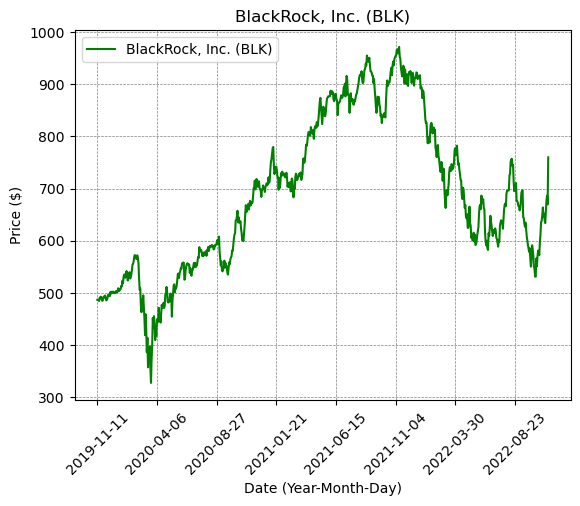

In [88]:
x = blk_df['Date']
y = blk_df['Close']

plt.xticks(np.arange(0, len(x)+1, 100), rotation=45)
plt.title('BlackRock, Inc. (BLK)')
plt.xlabel('Date (Year-Month-Day)')
plt.ylabel('Price ($)')
plt.plot(x, y, color = 'g')
plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)
plt.legend(['BlackRock, Inc. (BLK)'])
plt.show()

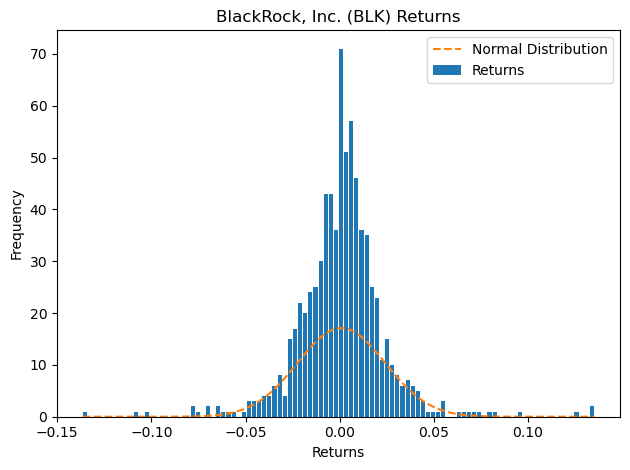

In [85]:
mu = blk_df['Returns'].mean()
sigma = blk_df['Returns'].std()

num_bins = 100

fig, ax = plt.subplots()

# the histogram of the data
n, bins, patches = ax.hist(blk_df['Returns'], num_bins, rwidth=0.8)

# add a normal distribution line
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
ax.plot(bins, y, '--')
ax.set_xlabel('Returns')
ax.set_ylabel('Frequency')
ax.legend(['Normal Distribution', 'Returns'])
ax.set_title('BlackRock, Inc. (BLK) Returns')

fig.tight_layout()
plt.show()



**How does this histogram differ from e g a normal distribution?** We can see that the returns don't follow the normal distribution. The most noticable thing here is that the normal distribution goes towards zero which makes it totally ignore the days with the most fluctuation in price